# 03 - Linear Regression

by [Alejandro Correa Bahnsen](http://www.albahnsen.com/) & [Iván Torroledo](http://www.ivantorroledo.com/)

version 1.2, Feb 2018

## Part of the class [Machine Learning for Risk Management](https://github.com/albahnsen/ML_RiskManagement)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Kevin Markham](https://github.com/justmarkham)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 99999;

<IPython.core.display.Javascript object>

In [3]:
# Test Dataset
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/houses_portland.csv.zip', 'r') as z:
    f = z.open('houses_portland.csv')
    data = pd.io.parsers.read_table(f, sep=',')
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.columns

Index(['area', 'bedroom', ' price'], dtype='object')

Text(0,0.5,'Price')

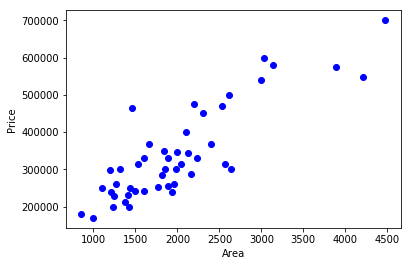

In [5]:
y = data[' price'].values
X = data['area'].values
plt.scatter(X, y,c='b')
plt.xlabel('Area')
plt.ylabel('Price')

## Normalize data

## $$ x = \frac{x -\overline x}{\sigma_x} $$ 

Text(0,0.5,'Price')

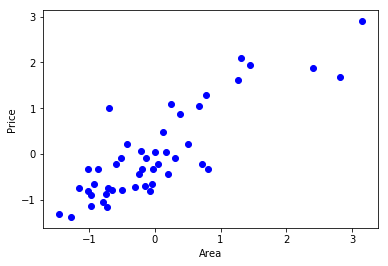

In [6]:
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y,c='b')
plt.xlabel('Area')
plt.ylabel('Price')

## Form of linear regression

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

###  Cost function

The goal became to estimate the parameters $\beta$ that minimisse the sum of squared residuals

## $$J(\beta_0, \beta_1)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

In [7]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

Lets suppose the following betas

In [8]:
beta_ini = np.array([-1, 1])

In [9]:
# h
def lr_h(beta,x):
    return np.dot(beta, x.T)

Text(0,0.5,'Price')

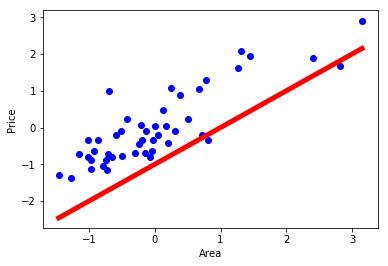

In [10]:
# scatter plot
plt.scatter(X, y,c='b')

# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Area')
plt.ylabel('Price')

Lets calculate the error of such regression

In [11]:
# Cost function
def lr_cost_func(beta, x, y):
    # Can be vectorized
    res = 0
    for i in range(x.shape[0]):
        res += (lr_h(beta,x[i, :]) - y[i]) ** 2
    res *= 1 / (2*x.shape[0])
    return res
lr_cost_func(beta_ini, X_, y)

0.6450124071218747

### Understanding the cost function

Lets see how the cost function looks like for different values of $\beta$

In [12]:
beta0 = np.arange(-15, 20, 1)
beta1 = 2

Text(0,0.5,'J(beta)')

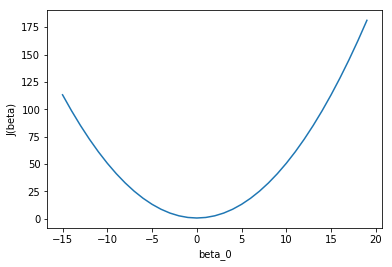

In [13]:
cost_func=[]
for beta_0 in beta0:
    cost_func.append(lr_cost_func(np.array([beta_0, beta1]), X_, y) )

plt.plot(beta0, cost_func)
plt.xlabel('beta_0')
plt.ylabel('J(beta)')

In [14]:
beta0 = 0
beta1 = np.arange(-15, 20, 1)

Text(0,0.5,'J(beta)')

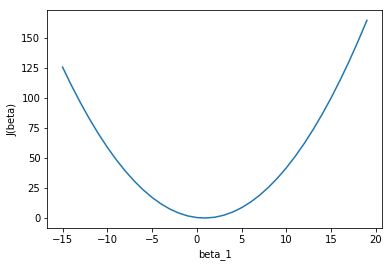

In [15]:
cost_func=[]
for beta_1 in beta1:
    cost_func.append(lr_cost_func(np.array([beta0, beta_1]), X_, y) )

plt.plot(beta1, cost_func)
plt.xlabel('beta_1')
plt.ylabel('J(beta)')

Analyzing both at the same time

In [16]:
beta0 = np.arange(-5, 7, 0.2)
beta1 = np.arange(-5, 7, 0.2)

In [17]:
cost_func = pd.DataFrame(index=beta0, columns=beta1)

for beta_0 in beta0:
    for beta_1 in beta1:
        cost_func.loc[beta_0, beta_1] = lr_cost_func(np.array([beta_0, beta_1]), X_, y)   

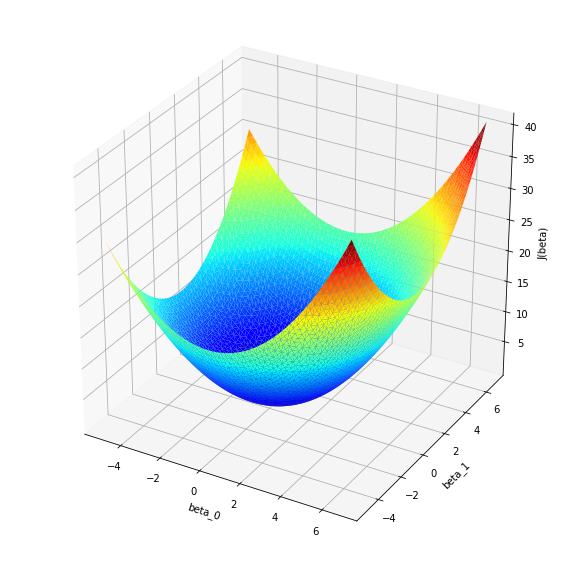

In [18]:
betas = np.transpose([np.tile(beta0, beta1.shape[0]), np.repeat(beta1, beta0.shape[0])])
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(betas[:, 0], betas[:, 1], cost_func.T.values.flatten(), cmap=cm.jet, linewidth=0.1)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('J(beta)')
plt.show()

It can also be seen as a contour plot

Text(0,0.5,'beta_1')

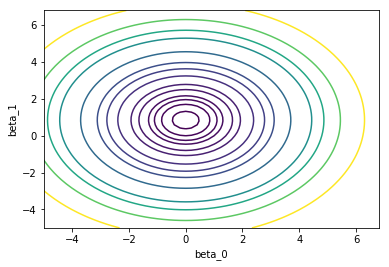

In [19]:
contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 12, 15, 20]
plt.contour(beta0, beta1, cost_func.T.values, contour_levels)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

Lets understand how different values of betas are observed on the contour plot

In [20]:
betas = np.array([[0, 0],
                 [-1, -1],
                 [-5, 5],
                 [3, -2]])



Linear Regression with betas  [0 0]


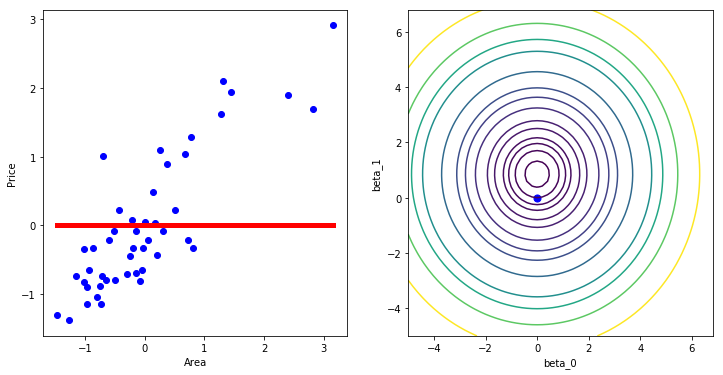



Linear Regression with betas  [-1 -1]


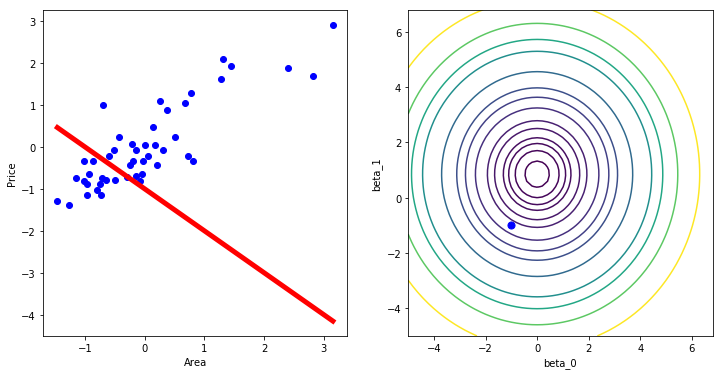



Linear Regression with betas  [-5  5]


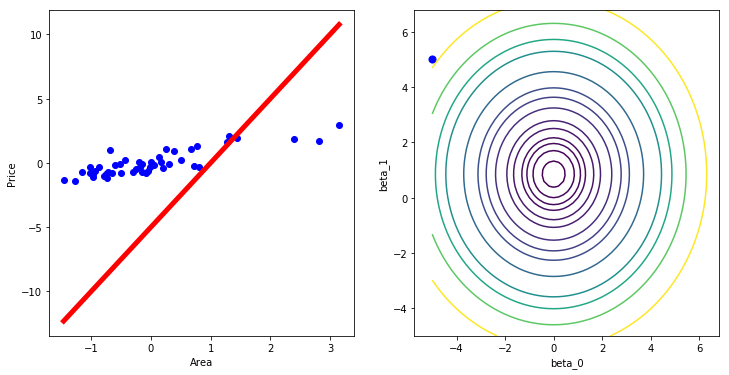



Linear Regression with betas  [ 3 -2]


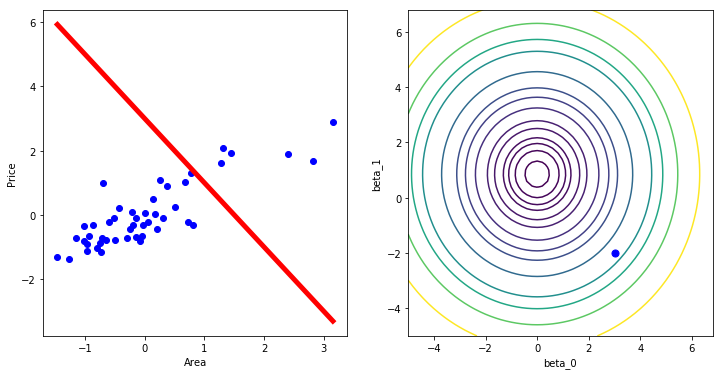

In [21]:
for beta in betas:
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1],c='b', s=50)

    # scatter plot
    ax1.scatter(X, y,c='b')

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()

## Gradient descent

Have some function $J(\beta_0, \beta_1)$

Want $\min_{\beta_0, \beta_1}J(\beta_0, \beta_1)$

Process:

* Start with some $\beta_0, \beta_1$

* Keep changing $\beta_0, \beta_1$ to reduce $J(\beta_0, \beta_1)$
until hopefully end up at a minimum

### Gradient descent algorithm

Repeat until convergence{

## $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1)$$


}

while simuntaneously update j=0 and j=1

$\alpha$ is refered as the learning rate

For the particular case of linear regression with one variable and one intercept the gradient is calculated as:


### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)^2$$

### $ j = 0: \frac{\partial }{\partial \beta_0} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ j = 1: \frac{\partial }{\partial \beta_1} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$


### Gradient descent algorithm

Repeat until convergence{

### $ \beta_0 := \beta_0- \alpha  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ \beta_1 := \beta_1- \alpha   \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$
}

simultaneously!

### Calculate gradient

In [22]:
# gradient calculation
beta_ini = np.array([-1.5, 0.])

def gradient(beta, x, y):
    # Not vectorized
    gradient_0  = 1 / x.shape[0] * ((lr_h(beta, x) - y).sum())
    gradient_1  = 1 / x.shape[0] * ((lr_h(beta, x) - y)* x[:, 1]).sum()

    return np.array([gradient_0, gradient_1])

gradient(beta_ini, X_, y)

array([-1.5       , -0.85498759])

### Gradient descent algorithm

In [23]:
def gradient_descent(x, y, beta_ini, alpha, iters): 
    betas = np.zeros((iters, beta_ini.shape[0] + 1))

    beta = beta_ini
    for iter_ in range(iters):

        betas[iter_, :-1] = beta
        betas[iter_, -1] = lr_cost_func(beta, x, y)
        beta -= alpha * gradient(beta, x, y)
        
    return betas

In [24]:
iters = 100
alpha = 0.05
beta_ini = np.array([-4., -4.])

betas =  gradient_descent(X_, y, beta_ini, alpha, iters)

Lets see the evolution of the cost per iteration

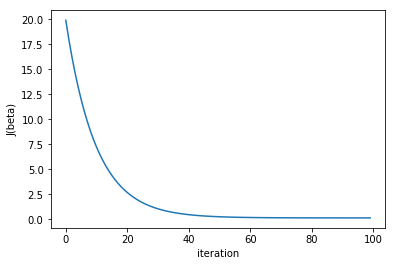

In [25]:
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)');

Understanding what it is doing in each iteration



Linear Regression with betas  [-4. -4.]


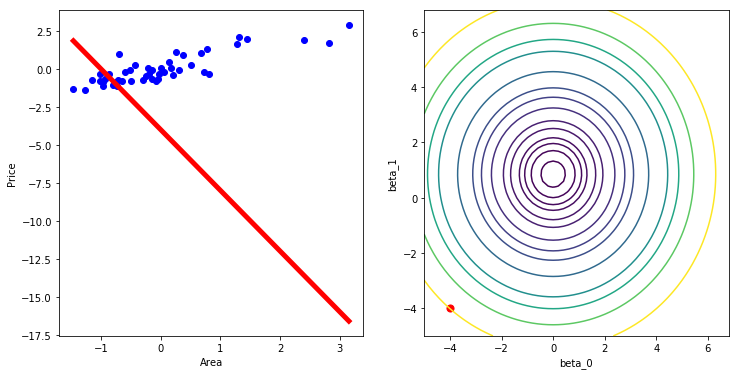



Linear Regression with betas  [-2.39494776 -2.05187282]


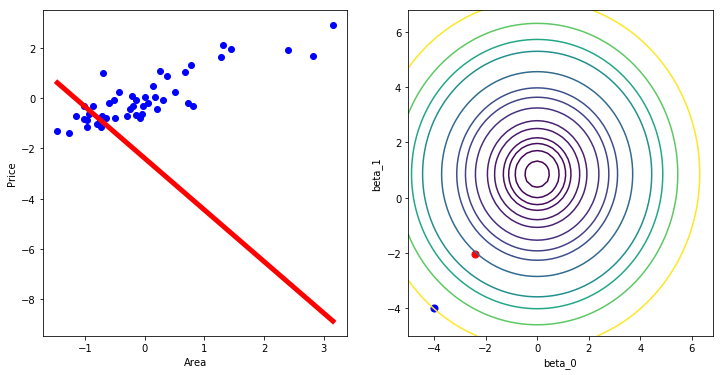



Linear Regression with betas  [-1.43394369 -0.88545711]


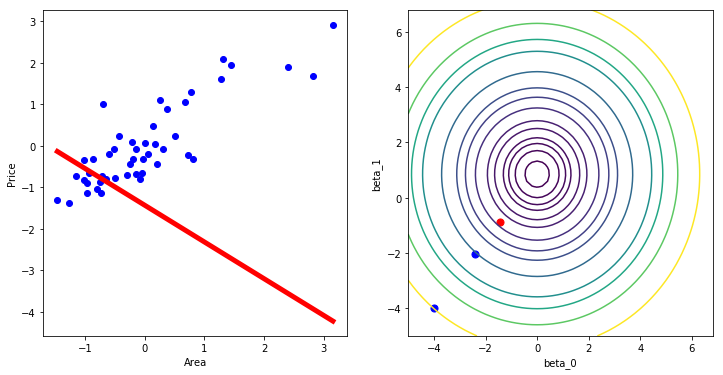



Linear Regression with betas  [-0.85855506 -0.18708094]


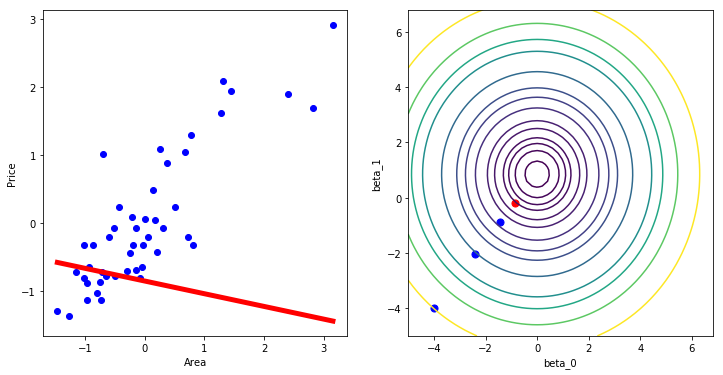



Linear Regression with betas  [-0.51404863  0.23106267]


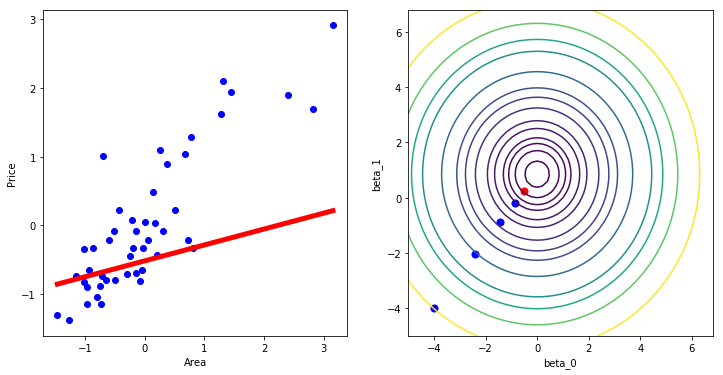



Linear Regression with betas  [-0.3077799   0.48142069]


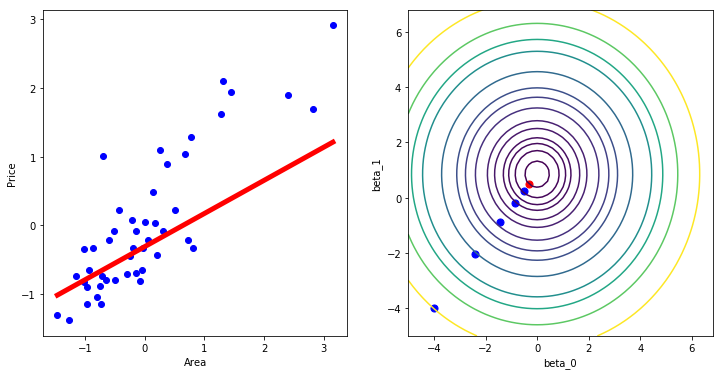



Linear Regression with betas  [-0.1842792   0.63131929]


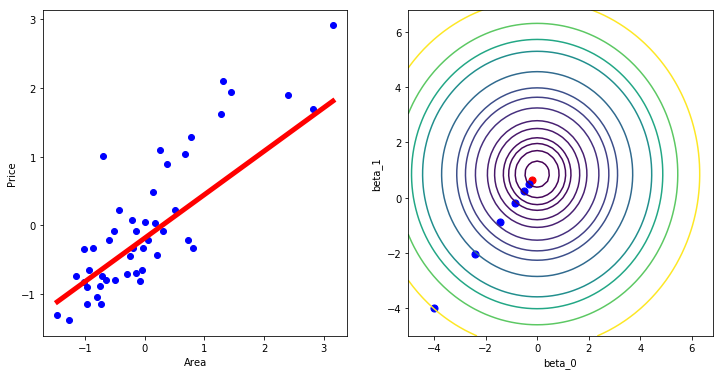



Linear Regression with betas  [-0.11033476  0.72106912]


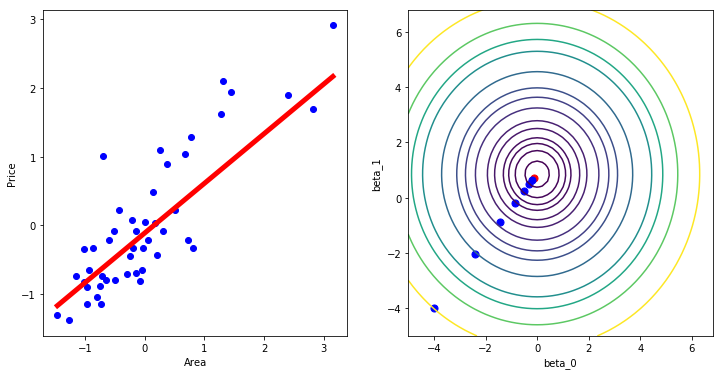



Linear Regression with betas  [-0.0660615   0.77480566]


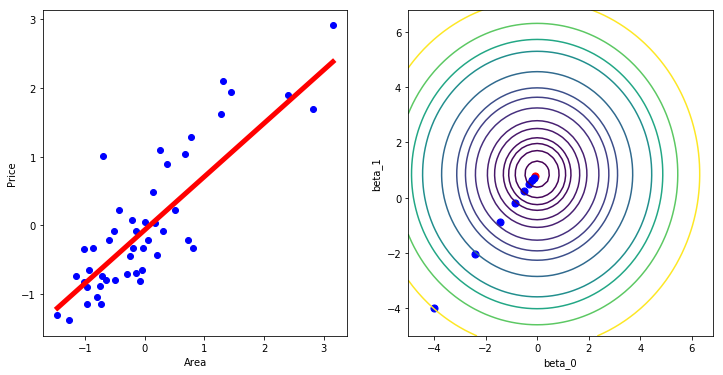



Linear Regression with betas  [-0.03955346  0.8069797 ]


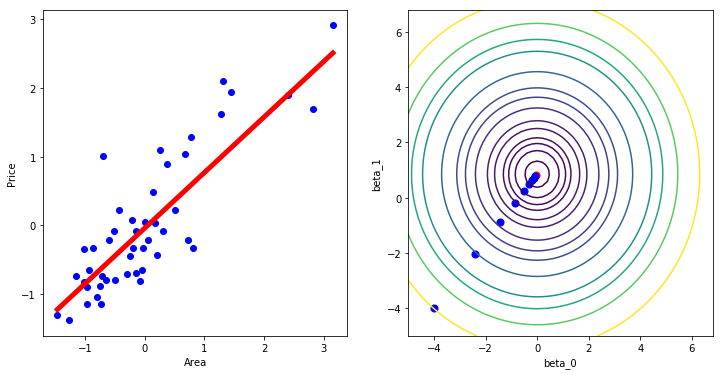

In [26]:
betas_ = betas[range(0, iters, 10), :-1]
for i, beta in enumerate(betas_):
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], c='r', s=50)
    
    if i > 0:
        for beta_ in betas_[:i]:
            ax2.scatter(beta_[0], beta_[1], c='b', s=50)

    # scatter plot
    ax1.scatter(X, y,c='b')

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()

Estimated Betas

In [27]:
betas[-1, :-1]

array([-0.02492854,  0.82473065])

## Normal equations (aka OLS)

## $$ \beta = (X^T X)^{-1} X^T Y $$


In [28]:
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))

In [29]:
beta

array([-6.21016827e-17,  8.54987593e-01])

# Estimating the regression using sklearn

### Using OLS

In [30]:
# import
from sklearn.linear_model import LinearRegression

In [31]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

In [32]:
# Fit
linreg.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [33]:
linreg.coef_

array([-8.88030989e-17,  8.54987593e-01])

### Using (Stochastic) Gradient Descent*

*Differs from normal gradient descent by updating the weights with each example. This converges faster for large datasets

In [34]:
# import
from sklearn.linear_model import SGDRegressor

In [35]:
# Initialize
linreg2 = SGDRegressor(fit_intercept=False, max_iter=100)

In [36]:
# Fit
linreg2.fit(X_,y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=False, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [37]:
linreg2.coef_

array([-2.66537282e-04,  8.53785614e-01])

# Comparing OLS and GD

|Gradient Descent|Normal Equation|
| :------------- | :------------- |
| Need to choose $\alpha$| No need to choose $\alpha$|
|Needs many iterations | Don't need to iterate|
|Works weel even when $k$ is large |Slow if $k$ is very large |
||Need to compute $(X^TX)^{-1}$|

# Linear regression with multiple variables

Lets create a new freature $ area^2 $

In [38]:
data['area2'] = data['area'] ** 2
data.head()

,area,bedroom,price,area2
0,2104,3,399900,4426816
1,1600,3,329900,2560000
2,2400,3,369000,5760000
3,1416,2,232000,2005056
4,3000,4,539900,9000000


### Notation review

 * n = n_samples = number of examples
 * k = number of features
 * y = price
 * $x^{(i)}$ = features of the $i$ example

In [39]:
i = 2
data.loc[2, ['area', 'area2']]

area        2400
area2    5760000
Name: 2, dtype: int64

* $x_j^{(i)}$ = value of the $j$ feature of the $i$ example

In [40]:
i = 2
j = 2
data.loc[2, 'area2']

5760000

### Hypothesis:

* Previously:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 $$

where $x_1$ = area

* New:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
where $x_2$ = $area^2$

### Create new matrix X and scale

In [41]:
X = data[['area', 'area2']].values
X[0:5]

array([[   2104, 4426816],
       [   1600, 2560000],
       [   2400, 5760000],
       [   1416, 2005056],
       [   3000, 9000000]])

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([2.00068085e+03, 4.62083843e+06]),
 array([7.86202619e+02, 4.05394589e+06]))

In [43]:
X[0:5]

array([[ 0.13141542, -0.04786014],
       [-0.5096407 , -0.50835371],
       [ 0.5079087 ,  0.28100069],
       [-0.74367706, -0.64524355],
       [ 1.27107075,  1.08022201]])

In [44]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.13141542, -0.04786014],
       [ 1.        , -0.5096407 , -0.50835371],
       [ 1.        ,  0.5079087 ,  0.28100069],
       [ 1.        , -0.74367706, -0.64524355],
       [ 1.        ,  1.27107075,  1.08022201]])

###  Cost function

The goal became to estimate the parameters $\beta$ that minimize the sum of squared residuals

### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x^{(i)})-y_i)^2$$


### $$h_\beta(x^{(i)}) = \sum_{j=0}^k \beta_j  x_j^{(i)}$$


### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n \left( \left( \sum_{j=0}^k \beta_j  x_j^{(i)}\right) -y_i \right)^2$$

Note that $x^0$ is refering to the column of ones

### Gradient descent algorithm

Repeat until convergence{

### $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta)$$


}

while simuntaneously update j=0..k

$\alpha$ is refered as the learning rate

In [45]:
beta_ini = np.array([0., 0., 0.])

# gradient calculation
def gradient(beta, x, y):
    return 1 / x.shape[0] * np.dot((lr_h(beta, x) - y).T, x)

gradient(beta_ini, X_, y)

array([ 9.44870659e-17, -8.54987593e-01, -8.33162685e-01])

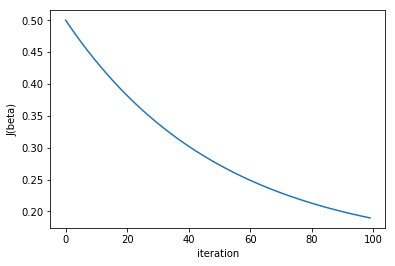

In [46]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.005
iters = 100
betas = gradient_descent(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)');

Aparently the cost function is not converging 

Lets change alpha and increase the number of iterations

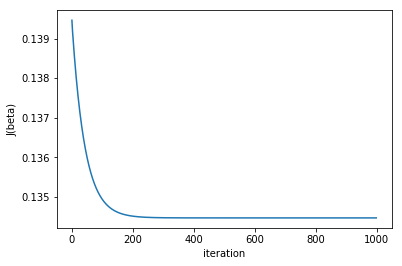

In [47]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.5
iters = 1000
betas = gradient_descent(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(1,iters), betas[1:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)');

In [48]:
print('betas using gradient descent\n', betas[-1, :-1])

betas using gradient descent
 [-9.44870659e-17  8.91147493e-01 -3.70307030e-02]


### Using the normal equations

In [49]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([-8.69526697e-17,  8.91150925e-01, -3.70341353e-02])

Difference

In [50]:
betas_ols - betas[-1, :-1]

array([ 7.53439626e-18,  3.43234287e-06, -3.43234287e-06])

# Making predictions

Predict the price when the area is 3000

Note: remeber the matrix X is scaled

In [51]:
x = np.array([3000., 3000.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[1.        , 1.27107075, 1.08022201]])

In [52]:
y_pred = lr_h(betas_ols, x_)
y_pred

array([1.09271078])

In [53]:
y_pred = y_pred * y_std + y_mean
y_pred

array([475583.75451797])

# Using sklearn

In [54]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf2 = SGDRegressor(max_iter=10000)

When using sklearn there is no need to create the intercept

Also sklearn works with pandas

In [55]:
clf1.fit(data[['area', 'area2']], data[' price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
clf2.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Making predictions

In [57]:
clf1.predict(x.reshape(1, -1))

array([475583.75451797])

In [58]:
clf2.predict(x_scaled.reshape(1, -1)) * y_std + y_mean

array([475469.3288585])

# Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [59]:
y_pred = clf1.predict(data[['area', 'area2']])

In [60]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(data[' price'], y_pred))
print('MSE:', metrics.mean_squared_error(data[' price'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(data[' price'], y_pred)))

MAE: 51990.96151069319
MSE: 4115290102.0599403
RMSE: 64150.526903993086


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.


# Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions